In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud

In [321]:
df =pd.read_csv('/Users/katierodeghiero/Downloads/Tweets.csv')
df.head()

df.shape

(14640, 15)

# 1. Data Exploration

<AxesSubplot:>

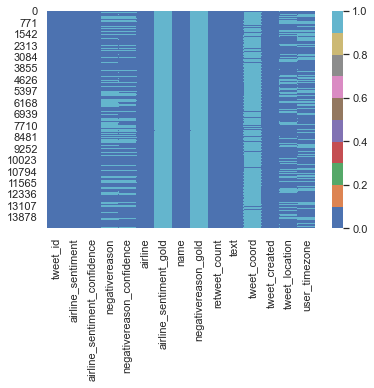

In [322]:
cols = df.columns[:15] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette())

In [323]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
# https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

tweet_id - 0%
airline_sentiment - 0%
airline_sentiment_confidence - 0%
negativereason - 37%
negativereason_confidence - 28%
airline - 0%
airline_sentiment_gold - 100%
name - 0%
negativereason_gold - 100%
retweet_count - 0%
text - 0%
tweet_coord - 93%
tweet_created - 0%
tweet_location - 32%
user_timezone - 33%


- airline_sentiment_gold is all null (100%)
- negativereason_gold is all null (100%)
- tweet_coord is basically useless (93%)

In [324]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

 # 2. Edit Data

In [325]:
## Data Cleaning
df = df.drop(columns = ['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'])
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')

## Factor airline and sentiment 
- didn't need to do this but thought I would use in

In [326]:
# factor airline sentiment and airline
def factor_sent(airline_sentiment):
    x = 2
    if airline_sentiment == 'positive':
        x = 1
    elif airline_sentiment == 'neutral':
        x = 0
    else:
        x = -1
    return x

new_list = []
for index, row in df.iterrows():
    y = factor_sent(row["airline_sentiment"])
    new_list.append(y)
    
df['sent_cat'] = new_list


In [327]:
df['airline'].unique()

def factor_airline(airline):
    x = -1
    if airline == 'Virgin America':
        x = 6
    elif airline == 'United':
        x = 5
    elif airline == 'Southwest':
        x = 4
    elif airline == 'Delta':
        x = 3
    elif airline == 'US Airways':
        x = 2
    elif airline == 'American':
        x = 1
    return x

new_list = []
for index, row in df.iterrows():
    y = factor_airline(row["airline"])
    new_list.append(y)
    
df['airline_cat'] = new_list


# 3. Data Visualizations

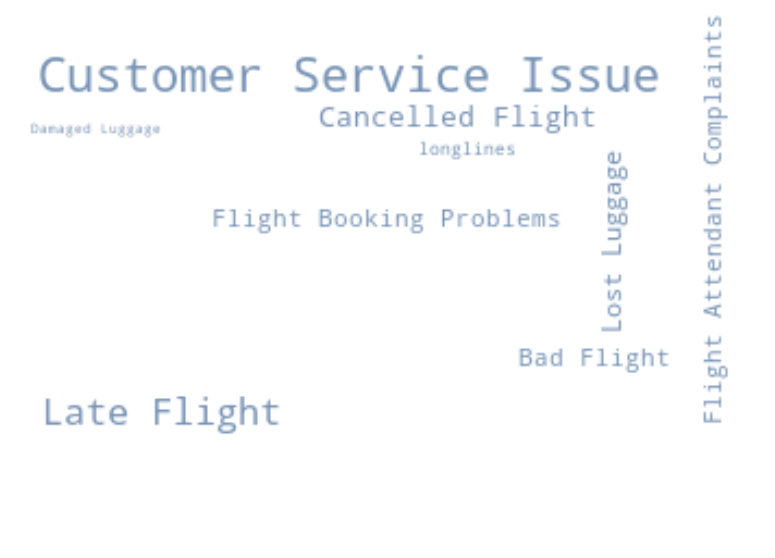

In [330]:
# Word Cloud of the Negative Reasons

df_hold = df[df.negativereason != "Can't Tell"]
hold = df_hold['negativereason'].value_counts().to_dict()
wordcloud = WordCloud().generate_from_frequencies(hold)

def blue_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return ("hsl(212, 29%, 59%)")
wordcloud = WordCloud(background_color="white", width=350, height=250, max_words=500).generate_from_frequencies(yolo)
wordcloud.recolor(color_func = blue_color_func)
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

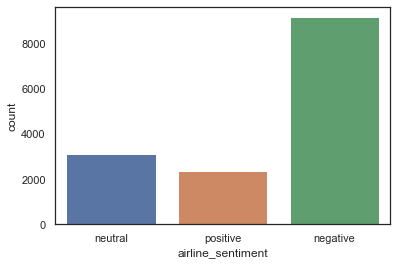

In [331]:
# Basic visualization of the distribution of tweet sentiment

sns.countplot(x="airline_sentiment", data=df) # make pretty

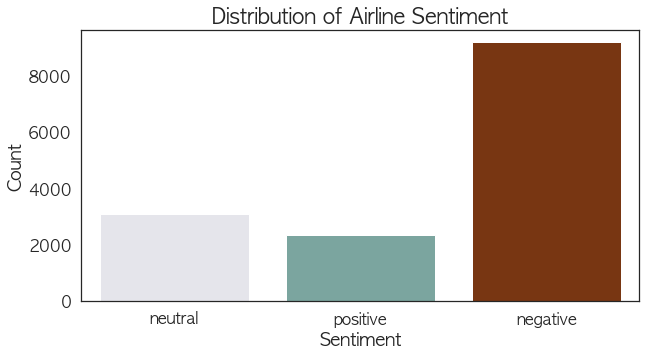

In [332]:
# nice visualization of of distribution of tweet sentiment

colors = ['#e4e4ec', '#74aca4', '#893101']

fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
ax=sns.countplot(x="airline_sentiment", data=df, palette=colors)
           
plt.title('Distribution of Airline Sentiment', fontsize=21, fontname= "AppleGothic")
plt.xlabel('Sentiment', fontsize = 18, fontname= "AppleGothic")
plt.xticks(fontsize=16, fontname= "AppleGothic")
plt.ylabel('Count', fontsize=18, fontname= "AppleGothic")
plt.yticks(fontsize=16, fontname= "AppleGothic")

ax.grid(False)
plt.show()

<AxesSubplot:xlabel='airline', ylabel='count'>

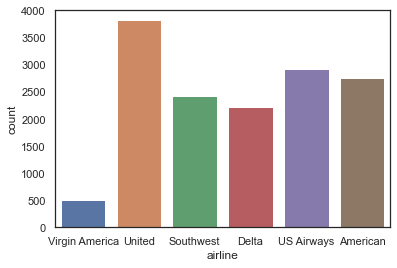

In [333]:
# number of tweets per airline (didn't use)

sns.countplot(x="airline", data=df)

In [334]:
# Was going to use this for a map visualization

df['tweet_location'].value_counts().index.tolist()[:15]

['Boston, MA',
 'New York, NY',
 'Washington, DC',
 'New York',
 'USA',
 'Chicago',
 'Los Angeles, CA',
 'New York City',
 'NYC',
 'San Francisco, CA',
 'San Francisco',
 'Chicago, IL',
 'Brooklyn, NY',
 'Austin, TX',
 'Los Angeles']

In [335]:
# pie chart data

df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

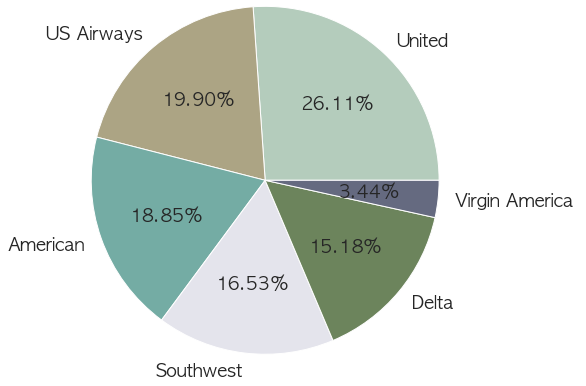

In [336]:
# pie chart of number of tweets per airline

y = np.array([3822, 2913, 2759, 2420, 2222, 504])

mylabels = ["United", "US Airways", "American", "Southwest", "Delta", "Virgin America "]
mycolors = ["#b4ccbc", "#aca484", "#74aca4", "#e4e4ec", "#6c845c", "#656a80"]
#textprops = {'fontname':'Gill Sans'}
textprops = {'fontname':'AppleGothic', 'fontsize':18}

plt.pie(y, labels = mylabels, colors = mycolors, autopct = "%0.2f%%", textprops = textprops, radius=2)
#plt.title("Percent of Tweets Recieved By Airline", fontsize=14);
plt.show() 

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

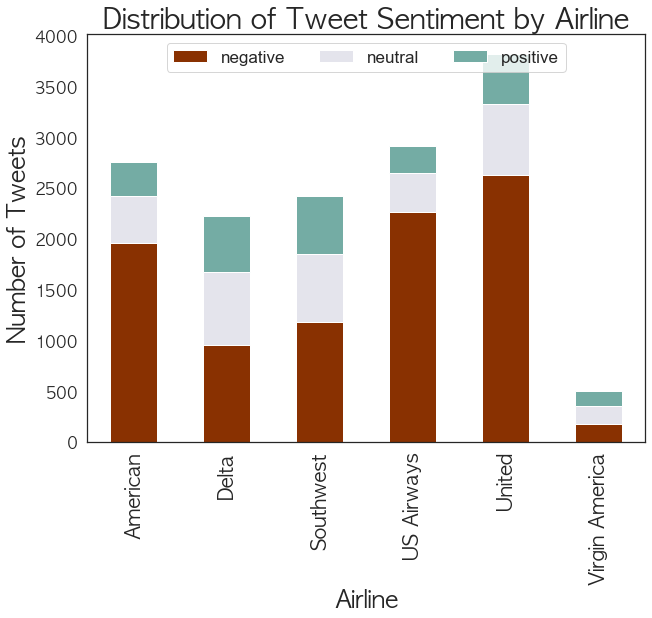

In [339]:
#Distribution of Tweet Sentiment by Airline

textprops = {'fontname':'AppleGothic'}

df_plot = df.groupby(['airline_sentiment', 'airline']).size().reset_index().pivot(columns='airline_sentiment', 
                                                                                  index='airline', values=0)
df_plot.plot(kind='bar', stacked=True, color=["#893101", "#e4e4ec", "#74aca4"], figsize=(10, 7.5)).legend(
    loc='upper center', ncol=3, fontsize = 17)

plt.title("Distribution of Tweet Sentiment by Airline", fontsize=28, fontname= "AppleGothic")
plt.xlabel("Airline", fontsize=24, fontname= "AppleGothic")
plt.ylabel("Number of Tweets", fontsize=24, fontname= "AppleGothic")
plt.xticks(fontsize=20, fontname= "AppleGothic")
plt.yticks(fontsize=16, fontname= "AppleGothic")


In [343]:
# all airline negative reason counts

df['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [344]:
# negatie reason counts per airline 

d = df.loc[df['airline'] == 'Delta']
d['negativereason'].value_counts()

s = df.loc[df['airline'] == 'Southwest']
s['negativereason'].value_counts()

us = df.loc[df['airline'] == 'US Airways']
us['negativereason'].value_counts()

u = df.loc[df['airline'] == 'United']
u['negativereason'].value_counts()

va = df.loc[df['airline'] == 'Virgin America']
va['negativereason'].value_counts()

a = df.loc[df['airline'] == 'American']
a['negativereason'].value_counts()

u['negativereason'].value_counts()

Customer Service Issue         681
Late Flight                    525
Can't Tell                     379
Lost Luggage                   269
Bad Flight                     216
Cancelled Flight               181
Flight Attendant Complaints    168
Flight Booking Problems        144
longlines                       48
Damaged Luggage                 22
Name: negativereason, dtype: int64

In [345]:
# only the top five reasons to graph

hold = (df["negativereason"] == "Customer Service Issue") | (df["negativereason"] == "Late Flight") | (df["negativereason"] == "Cancelled Flight") | (df["negativereason"] == "Lost Luggage") | (df["negativereason"] == "Bad Flight")
dataF = df.loc[hold]

dataF.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sent_cat,airline_cat
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),-1,6
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada),-1,6
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last we...,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada),-1,6
24,570256553502068736,negative,1.0000,Customer Service Issue,0.3557,Virgin America,ayeevickiee,0,@VirginAmerica you guys messed up my seating.....,2015-02-24 08:18:51 -0800,714,Mountain Time (US & Canada),-1,6
25,570249102404923392,negative,1.0000,Customer Service Issue,1.0000,Virgin America,Leora13,0,@VirginAmerica status match program. I applie...,2015-02-24 07:49:15 -0800,NaN,NaN,-1,6


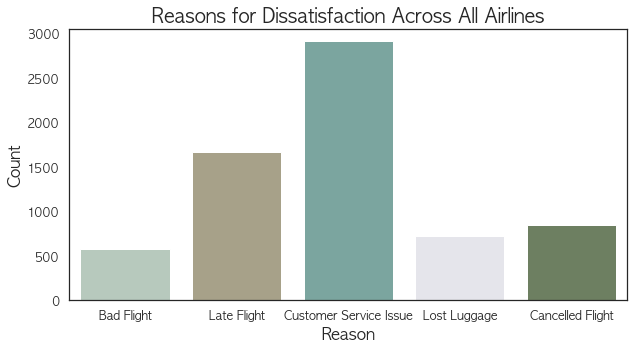

In [346]:
# reason for dissatisfaction across all airlines

colors = ["#b4ccbc", "#aca484", "#74aca4", "#e4e4ec", "#6c845c", "#656a80"]

fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
ax=sns.countplot(x="negativereason", data=dataF, palette=colors) # make pretty y='total_litres_of_pure_alcohol',
           
plt.title('Reasons for Dissatisfaction Across All Airlines', fontsize=19, fontname= "AppleGothic")
plt.xlabel('Reason', fontsize = 16, fontname= "AppleGothic")
plt.xticks(fontsize=12, fontname= "AppleGothic")
plt.ylabel('Count', fontsize=16, fontname= "AppleGothic")
plt.yticks(fontsize=12, fontname= "AppleGothic")
#ax.text(x=2.5, y=12.3, s='the highest \\nspirit servings',
       # color='red', size=17, weight='bold')
#sns.despine(bottom=True)
ax.grid(False)
#ax.tick_params(bottom=False, left=True)
plt.show()

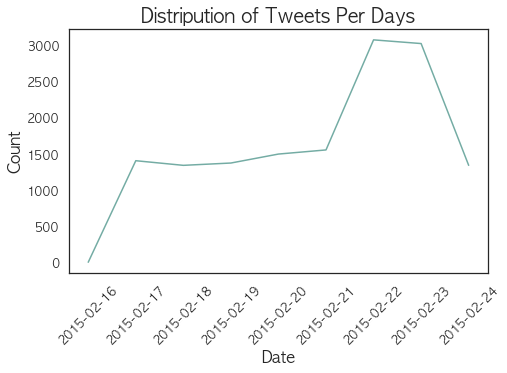

In [347]:
# Distribution of tweets per day

plt.rcParams["figure.figsize"] = (7.5,4.5)
plt.plot(df_temp['Dates'], df_temp['Counts'], color='#74aca4')

plt.title('Distripution of Tweets Per Days', fontsize=19, fontname= "AppleGothic")
plt.xlabel('Date', fontsize = 16, fontname= "AppleGothic")
plt.xticks(fontsize=12, fontname= "AppleGothic", rotation = 45)
plt.ylabel('Count', fontsize=16, fontname= "AppleGothic")
plt.yticks(fontsize=12, fontname= "AppleGothic")

plt.show()
